# EX2_2
Find different words in newspaper article
We'll do this using morphology operators and connected components.


In [695]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call('apt-get install subversion'.split())
    subprocess.call('svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_02a_basic_image_processing/ex2/news.jpg'.split())



In [696]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

figsize = (10, 10)



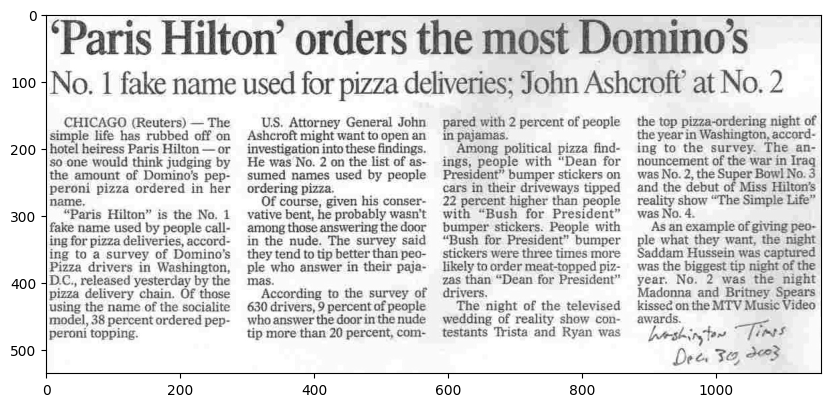

In [697]:
im = cv2.imread("news.jpg")
im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

plt.figure(figsize=figsize)
plt.imshow(im_gray,cmap="gray",vmin=0,vmax=255)
plt.show()



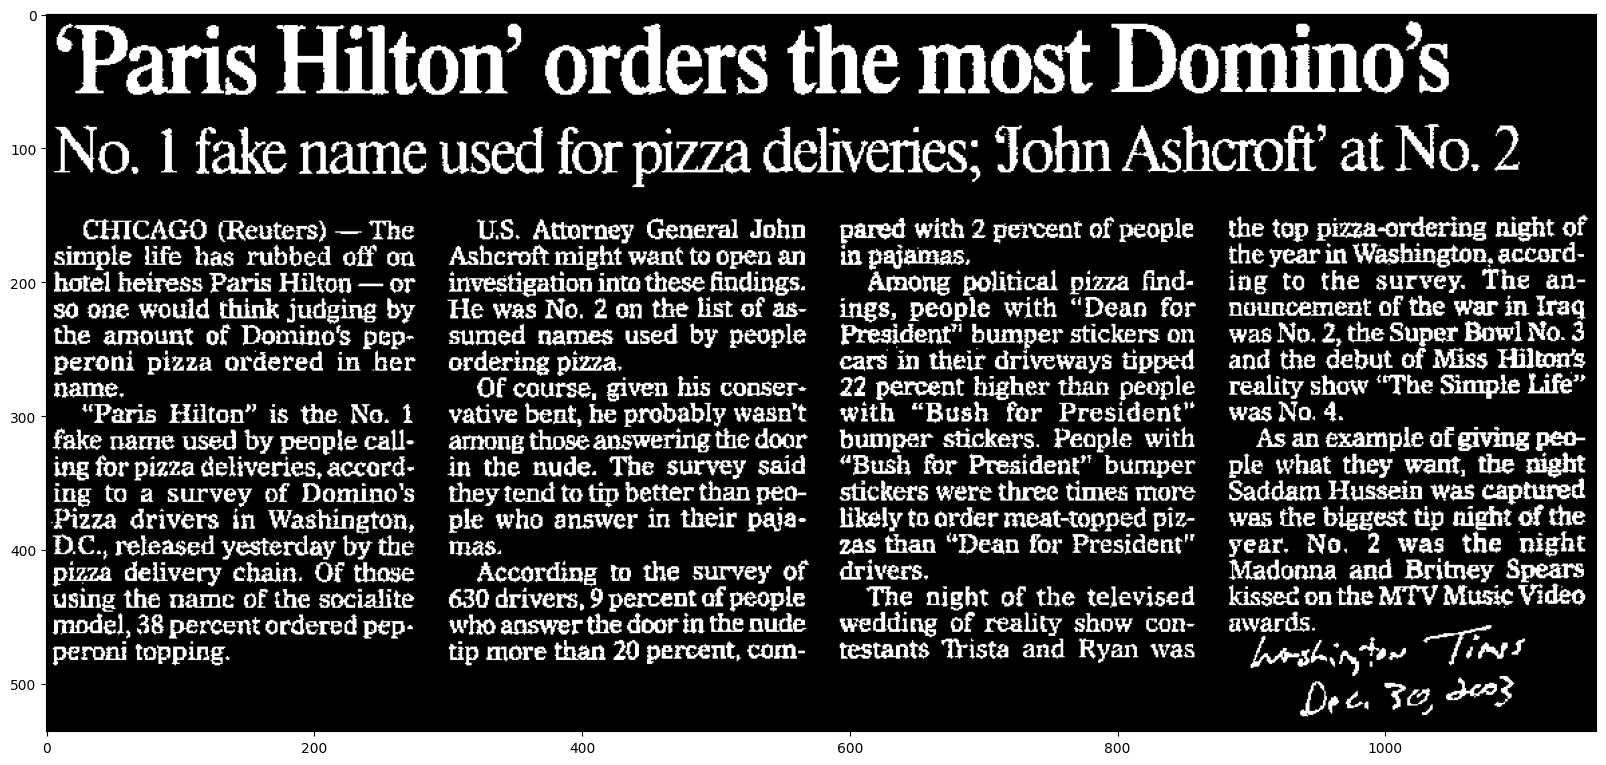

In [698]:
#  let's start with turning the image to a binary one
_, im_th = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.figure(figsize=(20,20))
plt.imshow(im_th,cmap="gray")



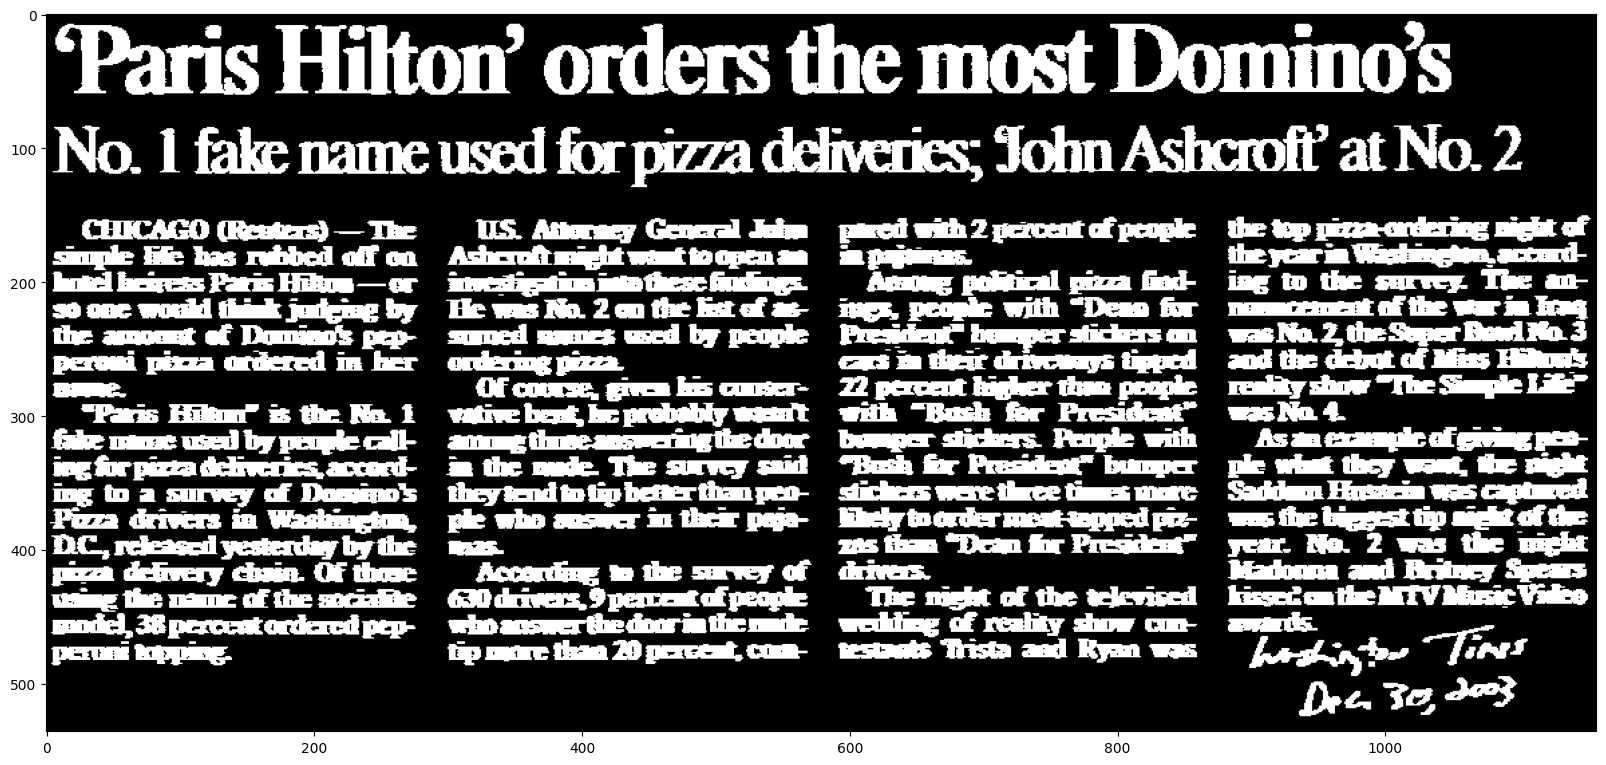

In [699]:
# TODO: next, merge all pixels of the same word together to make one connected component using a morphologic operator
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 1))
dilated_im = cv2.dilate(im_th, kernel, iterations=1)
plt.figure(figsize=(20, 20))
plt.imshow(dilated_im,cmap="gray",vmin=0,vmax=255)
plt.show()


In [700]:
def find_words(dilated_im, im):
    res = im.copy()
    min_area=100
   
    num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(dilated_im)

   
    for label in range(1, num_labels):
        mask = labels_im == label
        area = stats[label, cv2.CC_STAT_AREA]

        if area > min_area:
            res = plot_rec(mask, res)

    return res

def plot_rec(mask,res_im):
    # plot a rectengle around each word in res image using mask image of the word
    xy = np.nonzero(mask)
    y = xy[0]
    x = xy[1]
    left = x.min()
    right = x.max()
    up = y.min()
    down = y.max()

    res_im = cv2.rectangle(res_im, (left, up), (right, down), (0, 20, 200), 2)
    return res_im

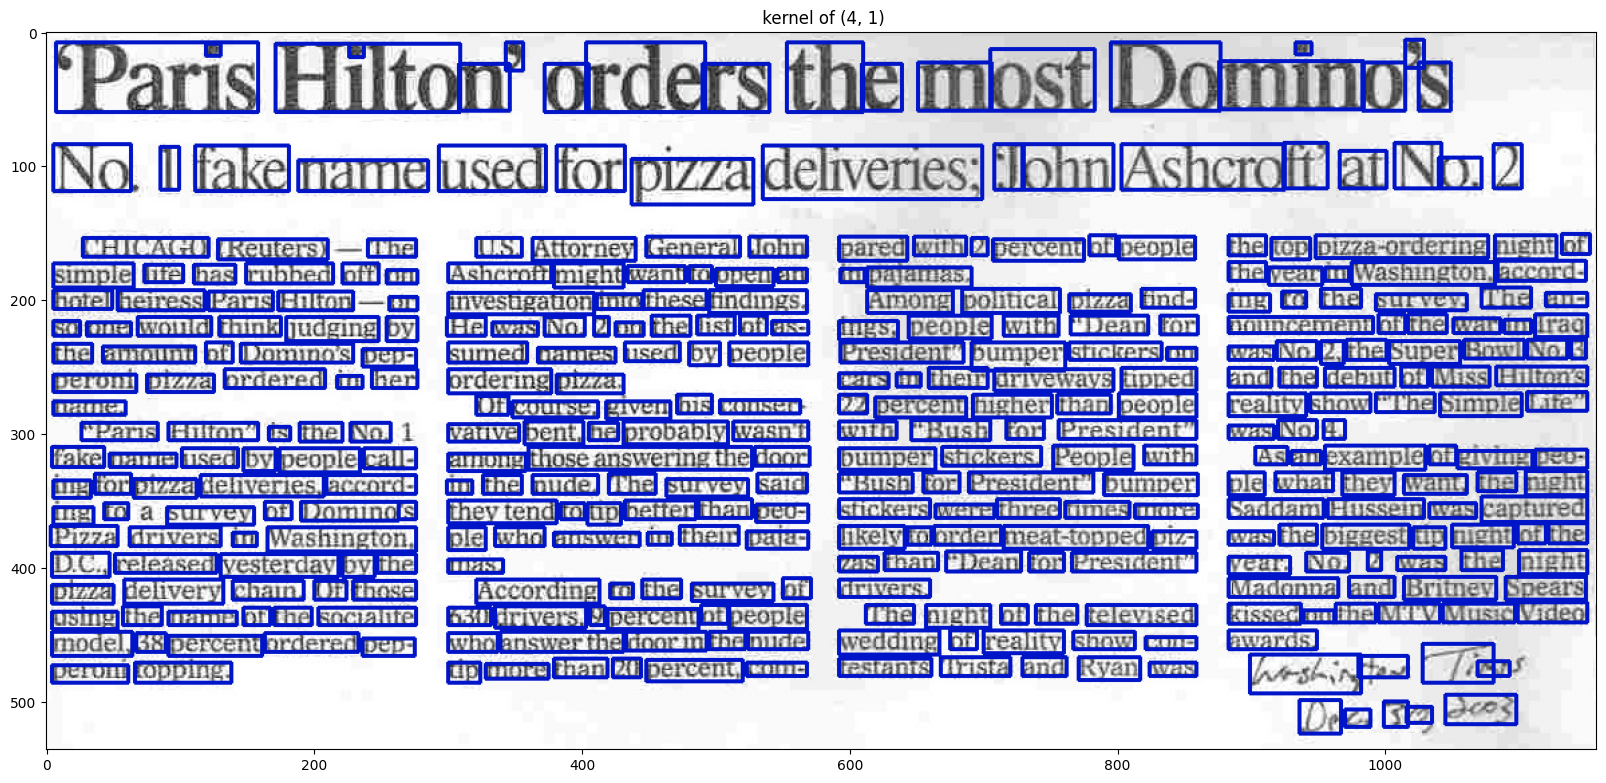

In [701]:
plt.figure(figsize=(20,20))
plt.imshow(find_words(dilated_im,im))
plt.title(" kernel of (4, 1)")
plt.show()




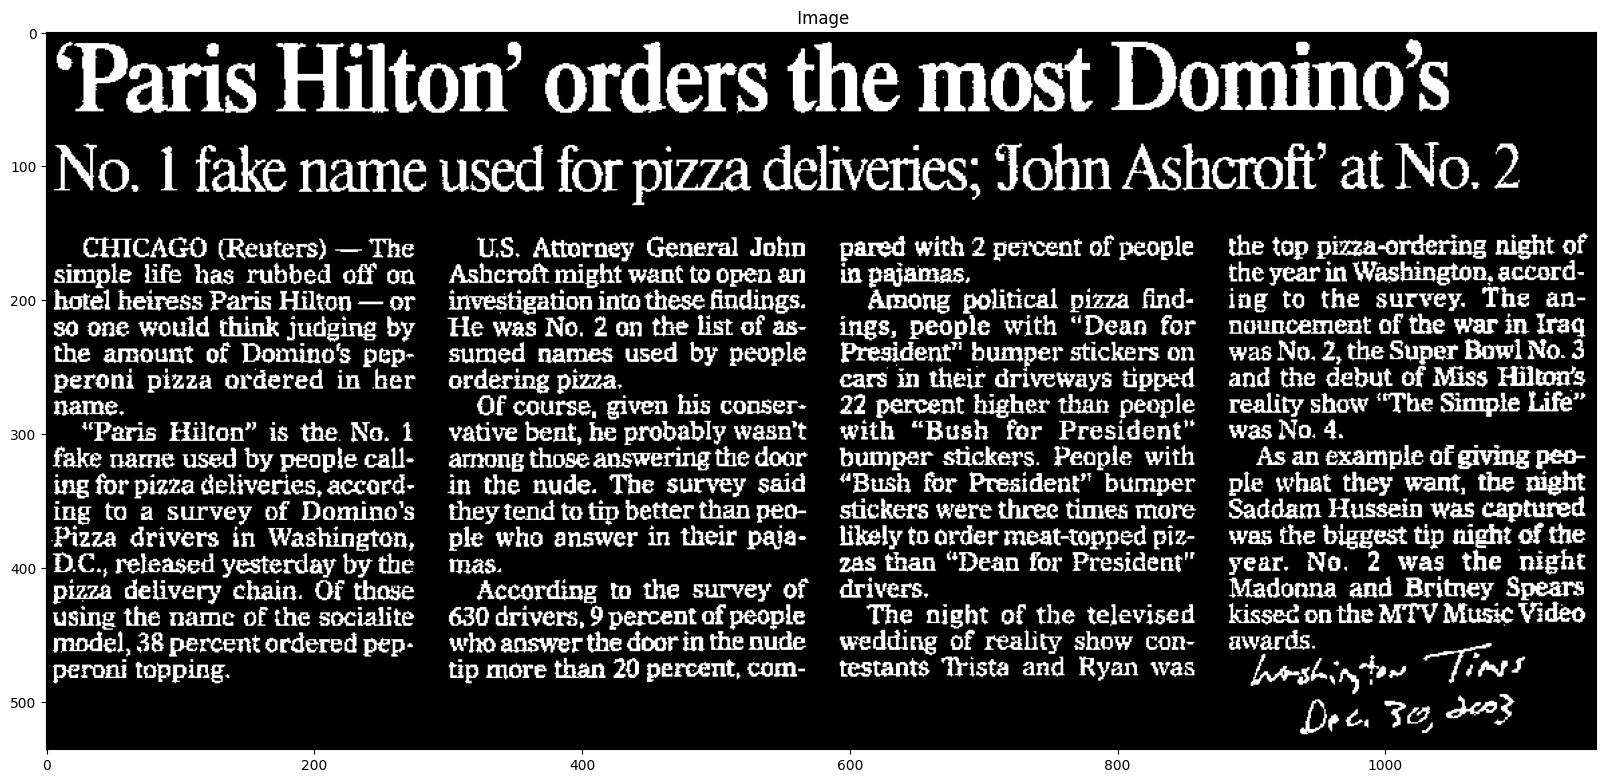

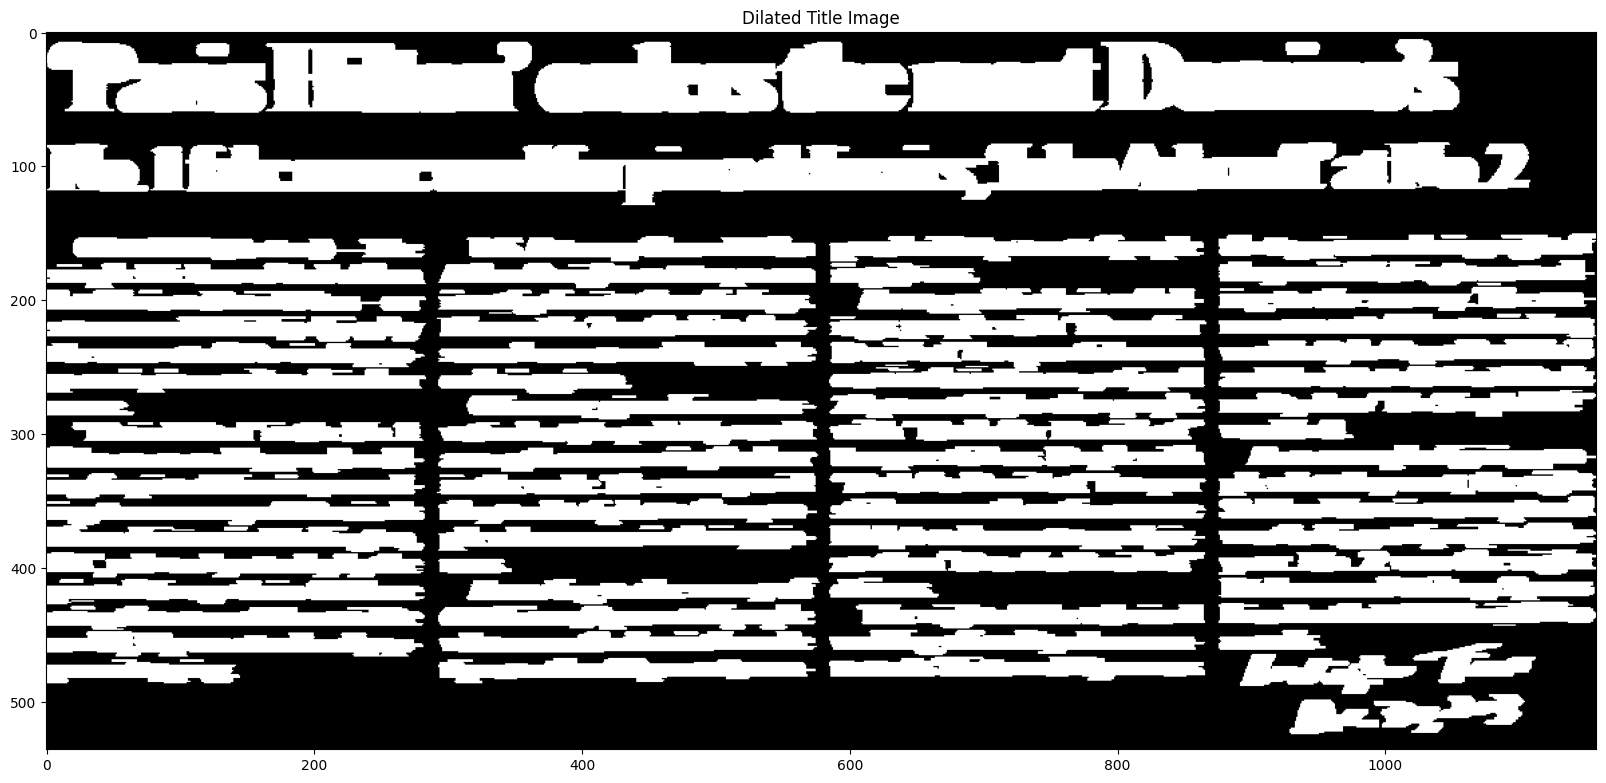

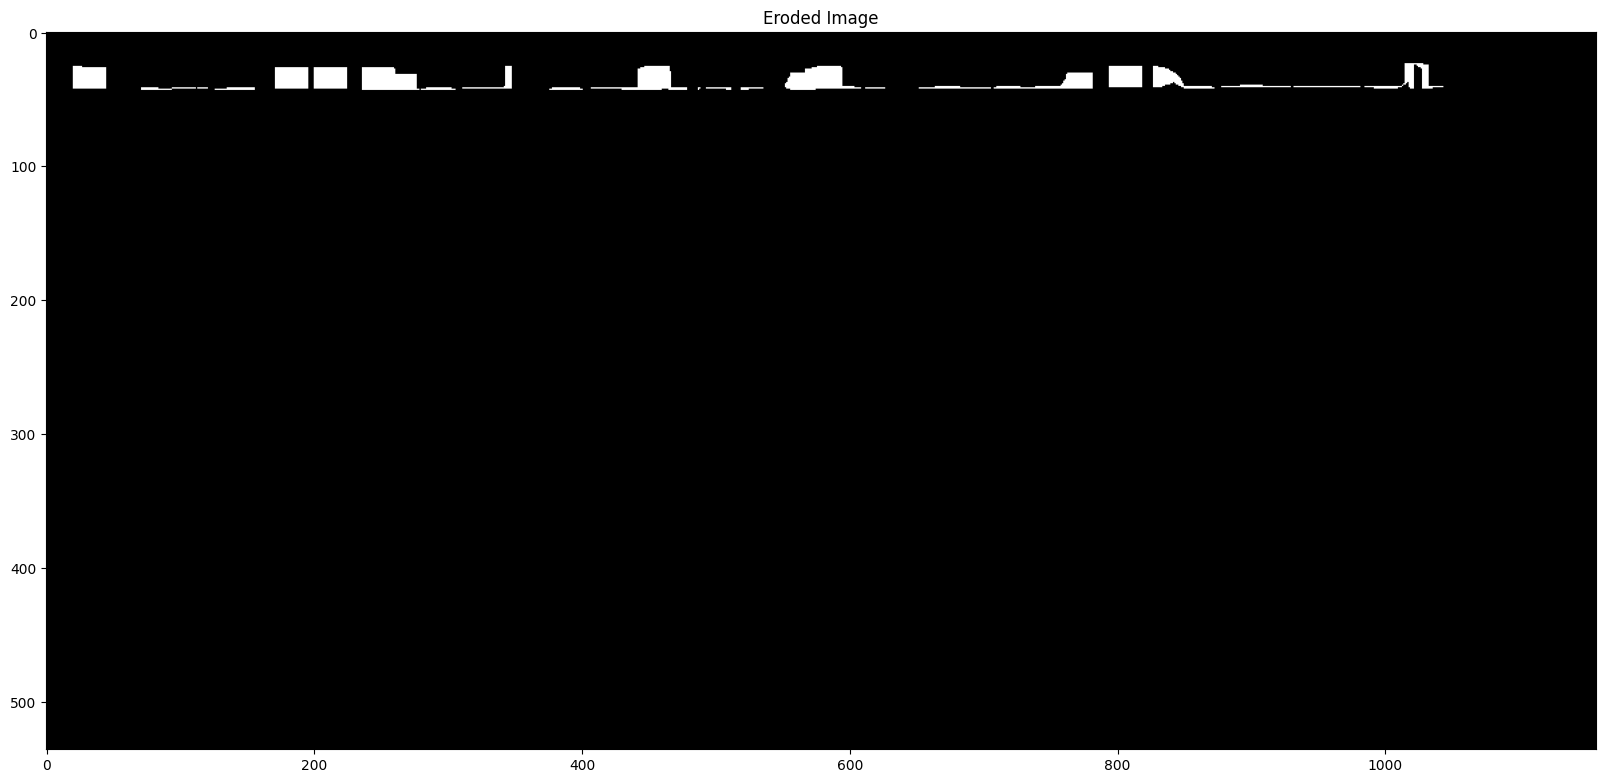

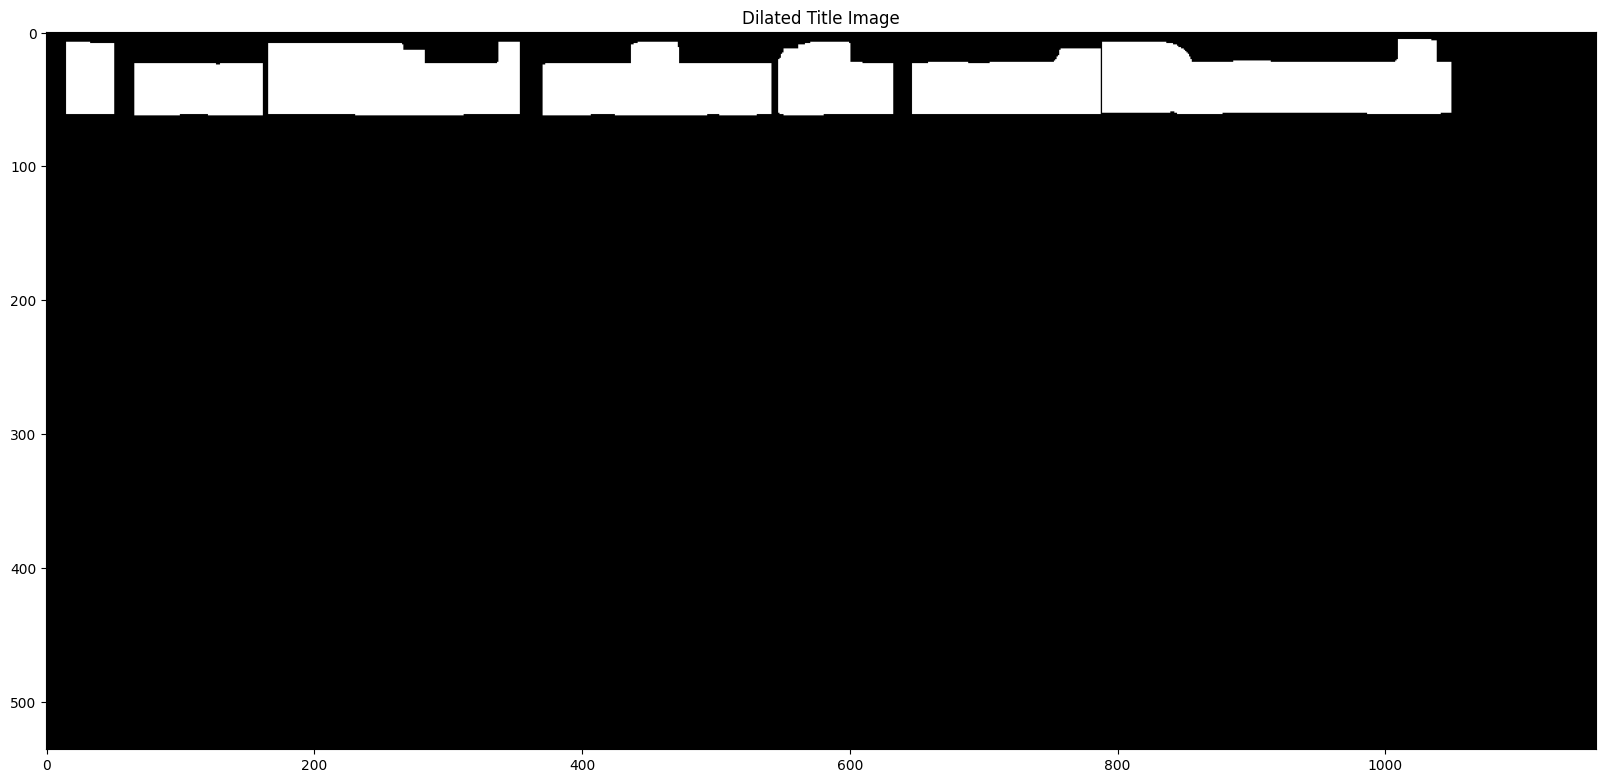

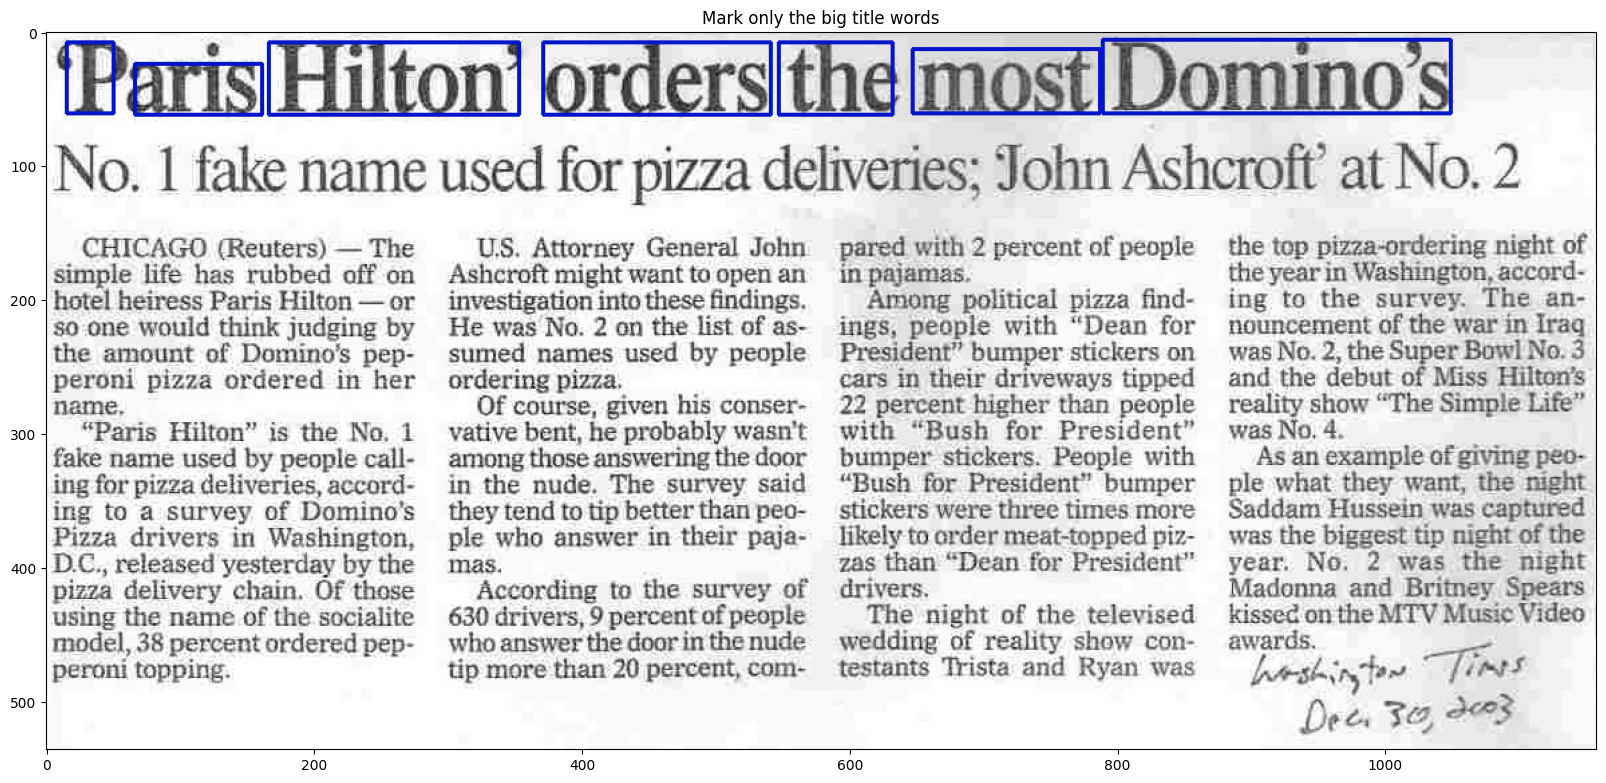

In [702]:

# TODO: now we want to mark only the big title words, and do this ONLY using morphological operators
plt.figure(figsize=(20, 20))
plt.imshow(im_th, cmap='gray', vmin=0, vmax=255)
plt.title(" Image")
plt.show()

dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (17, 1)) 
dilated_title_img = cv2.dilate(im_th, dilate_kernel, iterations=1)

plt.figure(figsize=(20, 20))
plt.imshow(dilated_title_img, cmap='gray', vmin=0, vmax=255)
plt.title("Dilated Title Image")
plt.show()


erode_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 36)) 
eroded_img = cv2.erode(dilated_title_img, erode_kernel, iterations=1)

plt.figure(figsize=(20, 20))
plt.imshow(eroded_img, cmap='gray', vmin=0, vmax=255)
plt.title("Eroded Image")
plt.show()


dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (12, 38)) 
dilated_title_img = cv2.dilate(eroded_img, dilate_kernel, iterations=1)

plt.figure(figsize=(20, 20))
plt.imshow(dilated_title_img, cmap='gray', vmin=0, vmax=255)
plt.title("Dilated Title Image")
plt.show()


binary_only_title_cc_img = dilated_title_img 
plt.figure(figsize=(20, 20))
plt.imshow(find_words(binary_only_title_cc_img, im))
plt.title("Mark only the big title words")
plt.show()


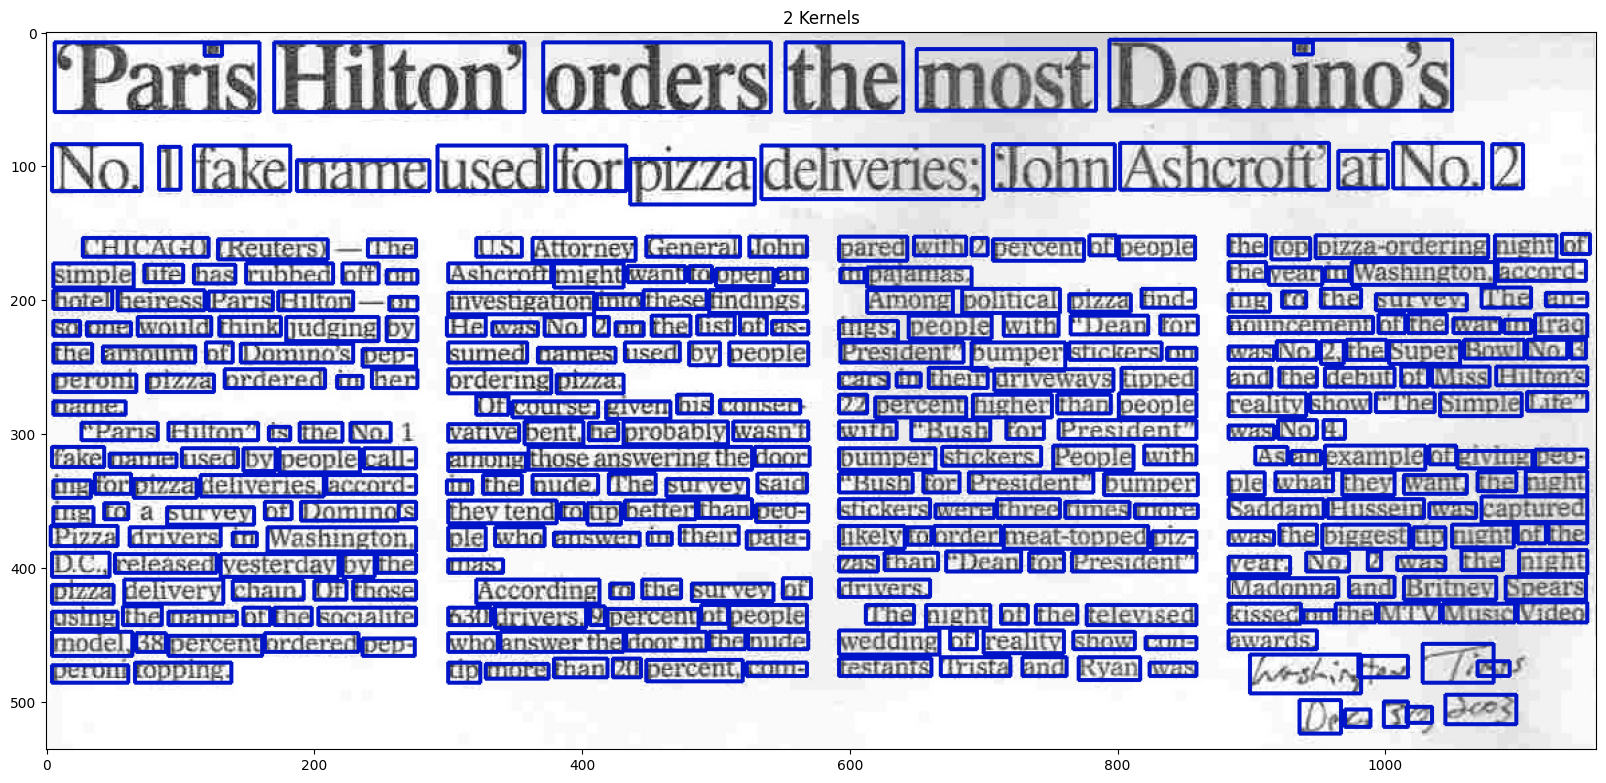

In [704]:
def find_words(im, im_th):# version two (not asked it is a bonus)
    kernel_1 = cv2.getStructuringElement(cv2.MORPH_RECT, (6, 1))  # for title
    kernel_2 = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 1))  # for body text

    title_section = im_th[0:125, :]
    body_section = im_th[125:550, :]

    dilated_title = cv2.dilate(title_section, kernel_1, iterations=1)
    dilated_body = cv2.dilate(body_section, kernel_2, iterations=1)

    dilated_im = np.vstack((dilated_title, dilated_body))

    res = im.copy()
    min_area = 100
    num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(dilated_im)

    for label in range(1, num_labels):
        mask = labels_im == label
        area = stats[label, cv2.CC_STAT_AREA]

        if area > min_area:
            res = plot_rec(mask, res)

    return res
result_image = find_words(im, im_th)

plt.figure(figsize=(20, 20))
plt.imshow(result_image)
plt.title("2 Kernels")
plt.show()